In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf



In [3]:
df1 = pd.read_csv('50_Startups.csv')
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
df = df1.drop(['State'],axis = 1)
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [7]:

df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


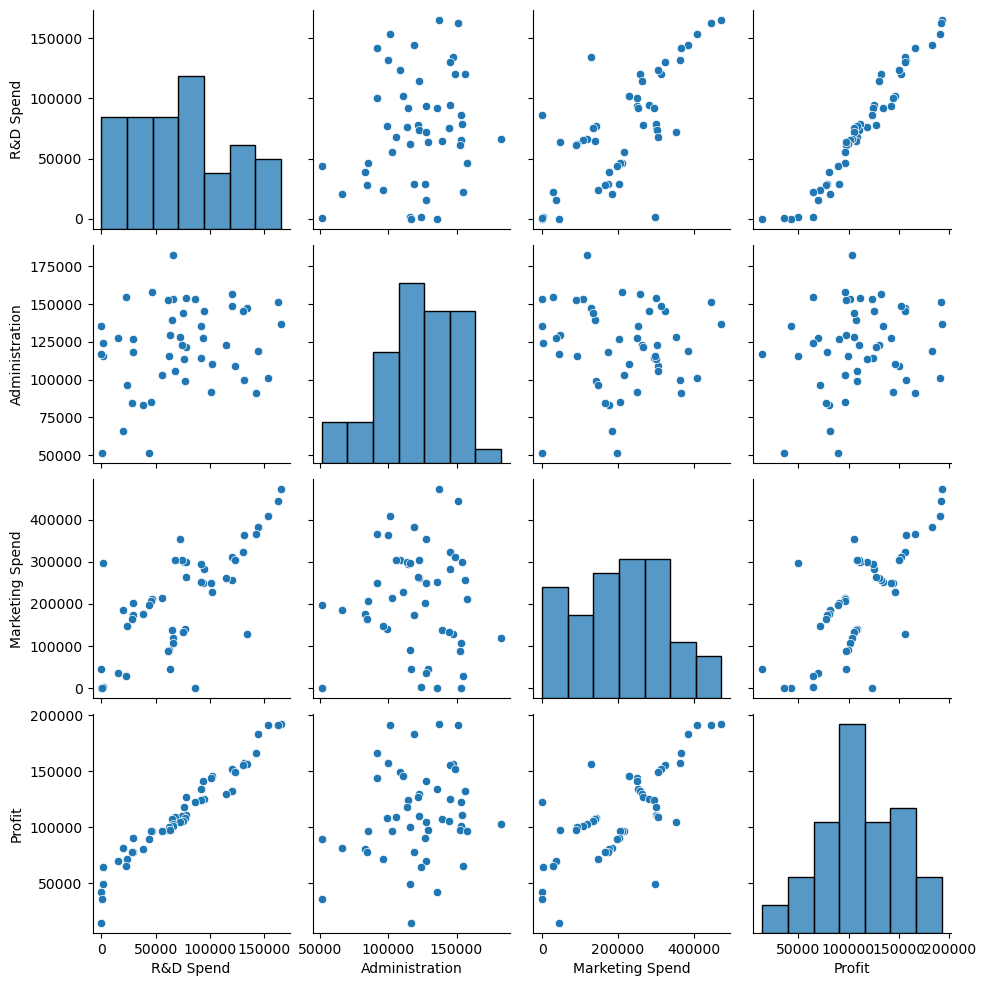

In [8]:
sns.pairplot(df)

In [9]:
df.rename(columns = {'R&D Spend':'Rdspend'}, inplace = True)
df.rename(columns = {'Marketing Spend': 'Marketing'}, inplace = True)

# BUILD MODEL

In [10]:
#build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit ~ Marketing + Administration + Rdspend',data=df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        12:29:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Rdspend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print(model.pvalues)

Intercept         1.057379e-09
Marketing         1.047168e-01
Administration    6.017551e-01
Rdspend           2.634968e-22
dtype: float64


In [13]:
#here the p values for marketing and administration is greather than 0.05 so, these are insignificant values

In [14]:
#check the pvalues individually
pv = smf.ols('Profit ~ Administration',data = df ).fit()
print(pv.pvalues)

Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
pva = smf.ols('Profit ~ Marketing', data = df).fit()
print(pva.pvalues)

Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [16]:
#when we check individually , here Aministration is insignificant value where marketing is significant value

In [17]:
#we consider the variable which is marketing and neglecting Administration hence vif method is not necessary

In [18]:
#but futher we check for vif method

# Vif method

In [22]:
rsq_Rdspend = smf.ols('Rdspend~Marketing+Administration',data=df).fit().rsquared  
vif_Rdspend= 1/(1-rsq_Rdspend) 

rsq_Marketing = smf.ols('Marketing~Rdspend+Administration',data=df).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing) 

rsq_Administration = smf.ols('Administration~Marketing+Rdspend',data=df).fit().rsquared  
vif_Administration= 1/(1-rsq_Administration) 


# Storing vif values in a data frame
d1 = {'Variables':['Marketing','Rdspend','Administration'],'VIF':[vif_Marketing,vif_Administration,vif_Rdspend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Marketing,2.326773
1,Rdspend,1.175091
2,Administration,2.468903


In [23]:
#so clearly we know that we should eliminate Administration

# QQ plot

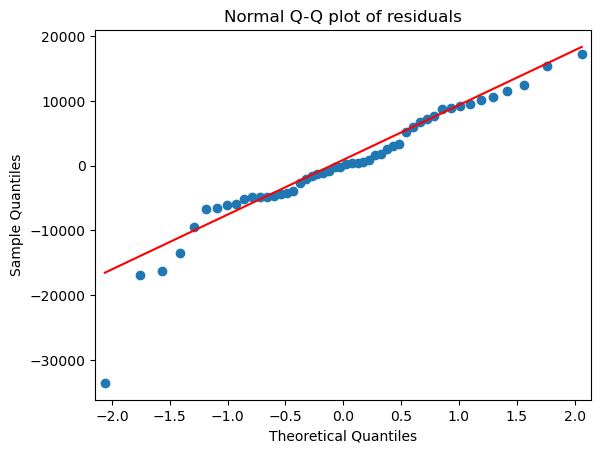

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual plot

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

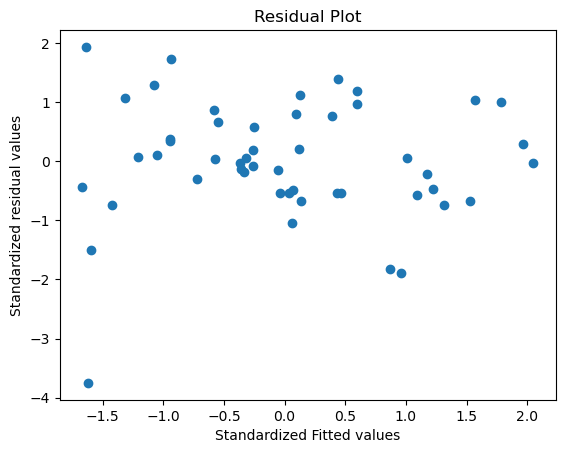

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals vs Regressors

eval_env: 1


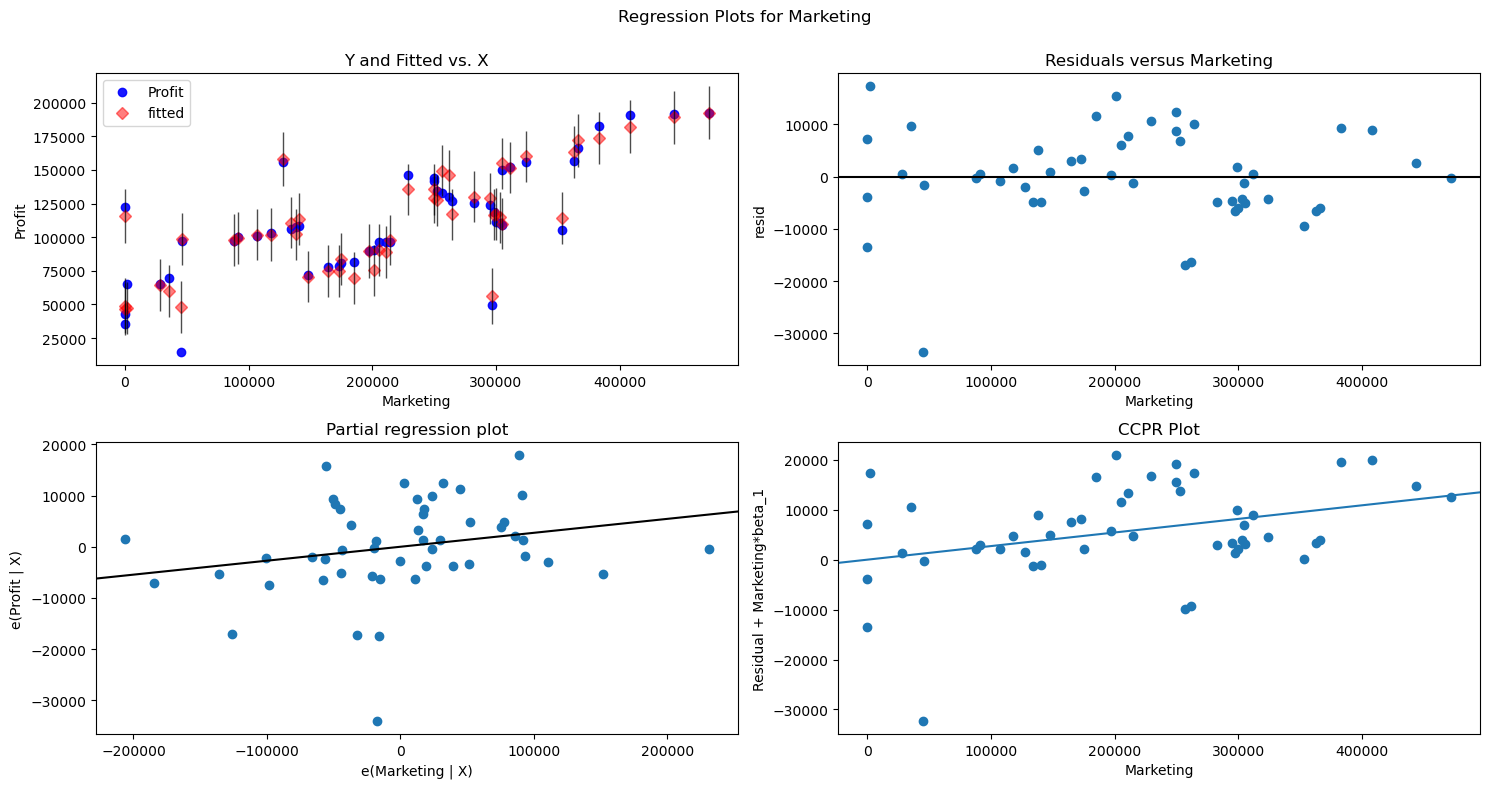

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

eval_env: 1


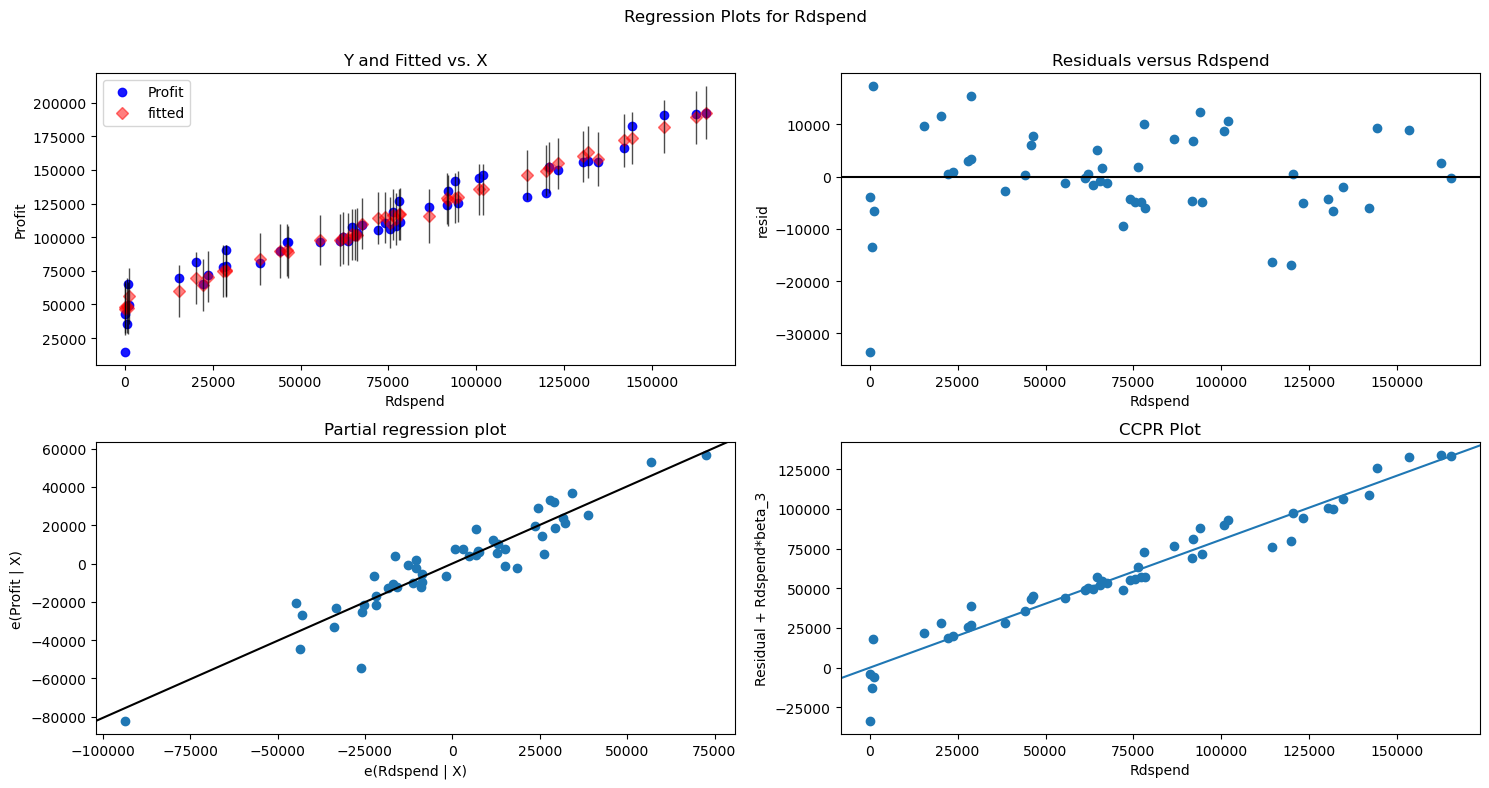

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Rdspend", fig=fig)
plt.show()

eval_env: 1


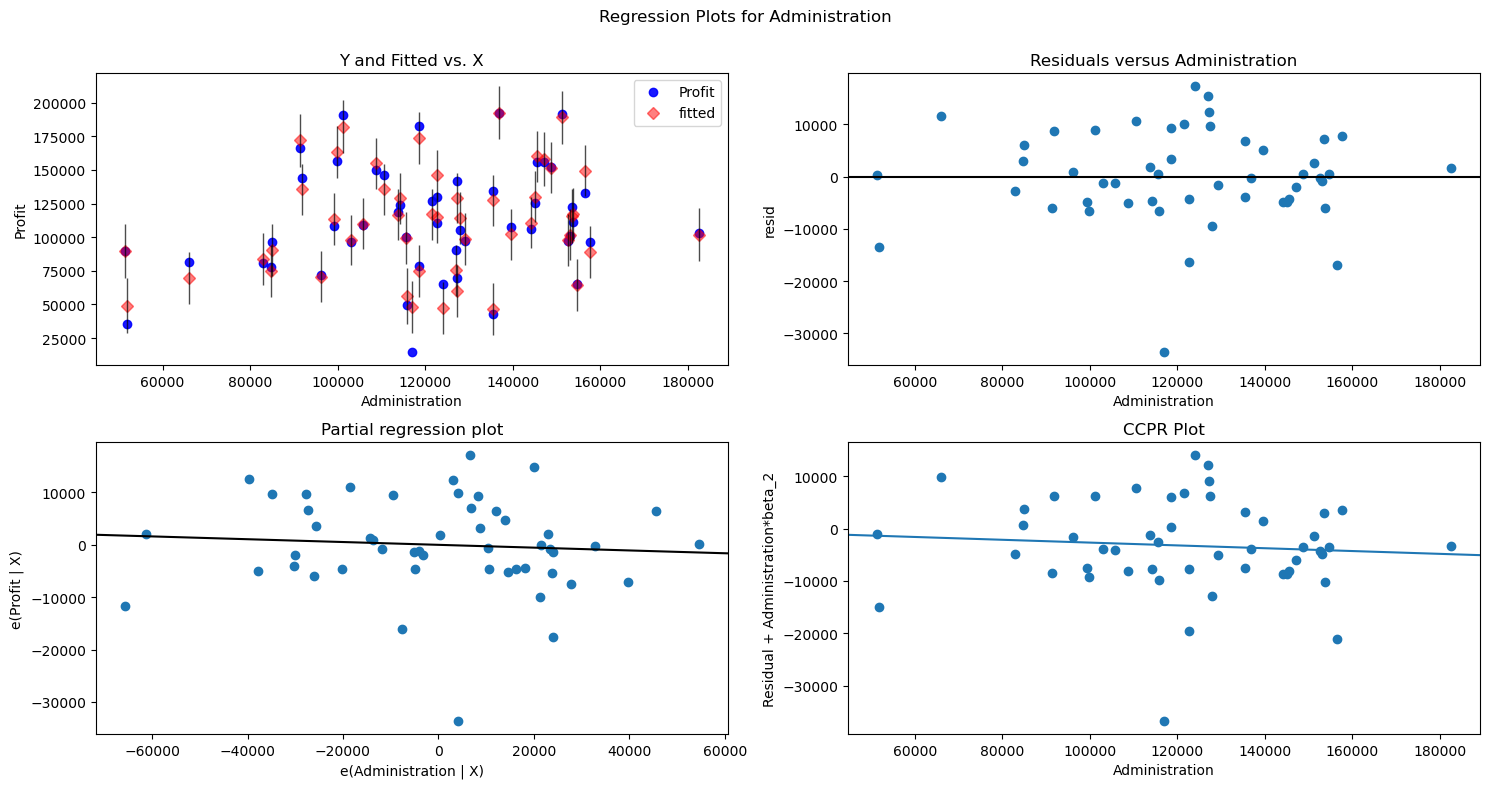

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

# model deletion diagnostics

# cooks distance

In [35]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

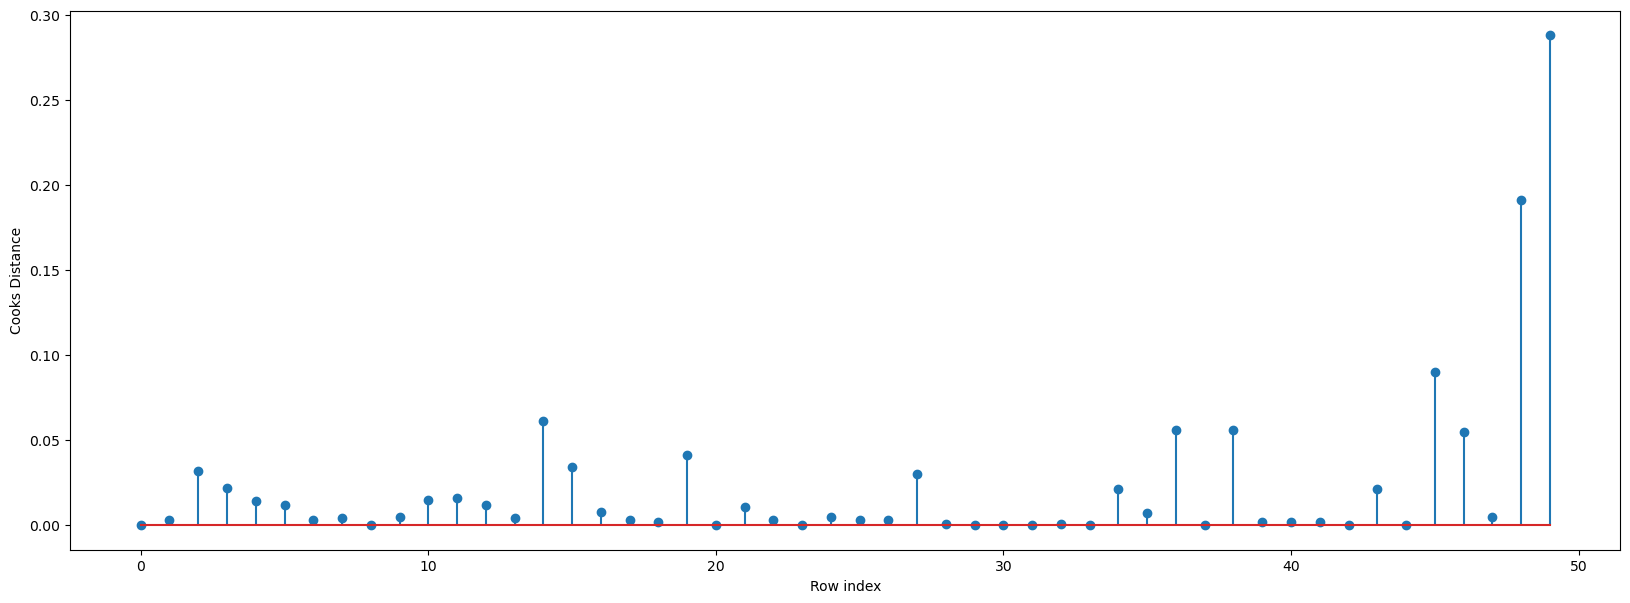

In [36]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#here all the observations of cooks distance is less than 1 so, there is no outliers 

# high influence points

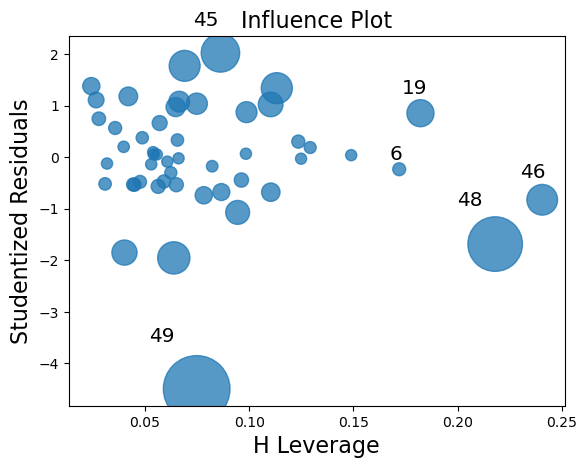

In [37]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
#here by observing above plot we observe that there is no influencers in it. even through we check it

In [39]:
k = 3
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.24

In [41]:
df[df.index.isin([ 46])]

,Rdspend,Administration,Marketing,Profit
46,1315.46,115816.21,297114.46,49490.75


In [42]:
#compare it with other columns
df.head()

,Rdspend,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [43]:
#so, clearly 46 observation is outlier so, we should remove that

# improve the model

In [46]:
#remove the outliers
df_new=df.drop(df.index[[46]],axis=0).reset_index()


In [47]:
df_new

,index,Rdspend,Administration,Marketing,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


# build model

In [50]:
import statsmodels.formula.api as smf 
model2 = smf.ols('Profit ~ Marketing  + Rdspend',data=df_new).fit()

In [51]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     425.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.09e-30
Time:                        13:08:32   Log-Likelihood:                -515.08
No. Observations:                  49   AIC:                             1036.
Df Residuals:                      46   BIC:                             1042.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.723e+04   2709.323     17.433      0.000    4.18e+04    5.27e+04
Marketing      0.0360      0.017      2.128      0.039       0.002       0.070
Rdspend        0.7781      0.046     16.877      0.000       0.685       0.871
==============================================================================
Omnibus:                       16.463   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.210
Skew:                          -1.037   Prob(JB):                     3.36e-06
Kurtosis:                       5.837   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# prediction for new data

In [60]:
#New data for prediction
new_data=pd.DataFrame({"Marketing":2,"Rdspend":2,"Administration" :2},index=[1])

In [61]:
final.predict(new_data) 

1    46977.517205
dtype: float64

In [62]:
final.predict(df.iloc[0:5,])

0    192800.458625
1    189774.659480
2    181405.378097
3    173441.308842
4    171127.623218
dtype: float64

In [63]:
pred_y = final.predict(df_new)

In [59]:
pred_y

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     46975.864221
47     47407.652602
48     48326.894462
dtype: float64